# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 5
*gelöst von Stollmayer Max*

### Aufgabe 1

_Zu implementieren ist eine Finite-Differenzen-Methode für ein Randwertproblem $\begin{cases} u''(x)=f(x), \ x \in [a,b] \\ u(a)=u_a, \ u(b)=u_b \end{cases}.$_

#### Konstruktion

Gegeben sei obiges Randwertproblem und ein gleichförmiges Gitter $[x_0 = a, x_1, \dots, x_n,\dots, x_{N-1}, x_N = b]$ mit Schrittweite $h.$ Für ein beliebiges $0 < n < N$ entwickeln wir folgende Taylor-Reihen und formen nach $u''$ um:

$$(+)\begin{cases}
    u(x_{n+1}) = u(x_n + h) = u(x_n) + h u'(x_n) + \frac{h^2}{2} u''(x_n) + \mathcal{O}(h^3) \\
    u(x_{n-1}) = u(x_n - h) = u(x_n) - h u'(x_n) + \frac{h^2}{2} u''(x_n) + \mathcal{O}(h^3)
\end{cases} \\
\iff u(x_{n+1}) + u(x_{n-1}) \approx 2 u(x_n) + h^2 u''(x_n) \\
\iff u''(x_n) \approx \frac{u(x_{n+1}) - 2 u(x_n) + u(x_{n-1})}{h^2}$$

Also gilt für das Verfahren an den inneren Gitterpunkten $\frac{u_{n-1} - 2u_n + u_{n+1}}{h^2} = f(x_n).$ Mit $u_0 := u_a$ und $u_N := u_b$ gilt für $n=1$ bzw. $n=N-1$ demnach $\frac{u_0 - 2u_1 + u_2}{h^2} = f(x_1) \iff \frac{-2u_1 + u_2}{h^2} = f(x_1) - \frac{u_a}{h^2}$ bzw. $\frac{u_{N-2} - 2u_{N-1}}{h^2} = f(x_{N-1}) - \frac{u_b}{h^2}.$ Das zu lösende System ist nun:

$$\frac{1}{h^2}
\begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 & \ddots & \vdots \\
    0 & 1 & \ddots & \ddots & 0 \\
    \vdots & \ddots & \ddots & \ddots & 1 \\
    0 & \cdots & 0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
    u_1 \\
    u_2 \\
    \vdots \\
    u_{N-2} \\
    u_{N-1}
\end{pmatrix}
=
\begin{pmatrix}
    f(x_1) - \frac{u_a}{h^2} \\
    f(x_2) \\
    \vdots \\
    f(x_{N-2}) \\
    f(x_{N-1}) - \frac{u_b}{h^2}
\end{pmatrix}$$

Da dies eine positiv definite, tridiagonale Matrix ist, verwenden wir in der kommenden Implementierung auch den Tridiagonal-Matrix-Algorithmus zum Lösen des Gleichungssystems benützen. Zuerst werden wir aber das Verfahren auf beliebige Gitter erweitern. Dazu müssen wir unseren Differenzenstern neu ermitteln. Also wir wollen $A, B, C$ finden, so dass $u''(x_n) \approx A u(x_n - h_{n-1}) + B u(x_n) + C u(x_n + h)$ gilt. Wir entwickeln diese Terme wieder in ihre Taylor-Reihen:

\begin{align*}
    u''(x_n) \approx & A u(x_n) - h_{n-1} A u'(x_n) + \frac{h_{n-1}^2}{2} A u''(x_n) \\
    & + B u(x_n) \\
    & + C u(x_n) + h_n C u(x_n) +\frac{h_n}{2} C u''(x_n) \\
    = & (A+B+C) u(x_n) + (h_n C - h_{n-1} A) u'(x_n) + \frac{h_n^2 C + h_{n-1}^2 A}{2} u''(x_n)
\end{align*}

Nach einem Koeffizientenvergleich müssen wir also folgendes System lösen:

\begin{cases}
A+B+C = 0 \\
h_n C - h_{n-1} A = 0 \\
\frac{h_n^2 C + h_{n-1}^2 A}{2} = 1
\end{cases}

Als Ergebnis bekommen wir $A=\frac{2}{h_{n-1} (h_{n-1} + h_n)}, B=-\frac{2}{h_{n-1} h_n}, C=\frac{2}{h_n (h_{n-1} + h_n)}.$ Ein Verfahrensschritt ist nun:

$$\frac{2 h_n u_{n-1} - 2 (h_{n-1} + h_n) u_n + 2 h_{n-1} u_{n+1}}{h_{n-1} h_n (h_{n-1} + h_n)} = f(x_n)$$

Dieses Berechnung des Differenzensterns kann man für beliebige Ableitungen und Anzahl der gewünschten Terme durchführen. Das Gleichungssystem lässt sich analog zum gleichförmigen Gitter aufstellen.

#### Konvergenz

Für die Konvergenz betrachten wir das Problem auf einem gleichförmigen Gitter. Durch eine Tayler-Entwicklung der einzelnen Terme erhält man:
$$\frac{u(x + h) - 2 u(x) + u(x - h)}{h^2} = u''(x)+\frac{h^2}{^2} u^{(4)}(x)+\mathcal{O}(h^3)$$

Damit ist hat das Verfahren Konsisntenzordnung 2 und es ist außerdem stabil, da für die Systemmatrix von oben alle Eigenwerte negativen Realteil haben. Nach dem Lax-Theorem ist das Verfahren also konvergent mit Ordnung 2. 

#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

In [2]:
def TDMA(T, y):
    '''
    The Tri-Diagonal-Matrix-Algorithm is a special case of Gaussian elimination for tridiagonal matrices.
    Returns solution x of T x = y.
    
    T ... tridiagonal matrix
    y ... vector
    '''
    
    n = len(y)
    
    if T.shape != (n, n):
        raise Exception(f"Input shapes are mismatched. Matrix: {T.shape}, Vector: ({n}).")
    
    for k in range(n):
        if np.allclose(T[k,k], 0):
            raise Exception(f"Matrix is (almost) zero on diagonal at Matrix[{k},{k}].")
    
    c = np.zeros(n-1)
    x = d = np.zeros(n)

    c[0] = T[0,1] / T[0,0]
    d[0] = y[0] / T[0,0]
    
    for k in range(1, n-1):
        c[k] = T[k,k+1] / (T[k,k] - c[k-1] * T[k+1,k])
        d[k] = (y[k] - d[k-1] * T[k+1,k]) / (T[k,k] - c[k-1] * T[k+1,k])
    
    d[n-1] = x[n-1] = (y[n-1] - d[n-2] * T[n-1,n-2]) / (T[n-1,n-1] - c[n-2] * T[n-1,n-2])
    
    for k in range(n-2,-1,-1):
        x[k] = d[k] - c[k] * x[k+1]
    
    return x

In [3]:
def FDM(f, ua, ub, grid):
    '''
    Returns list of function values on the given grid using a finite difference method for second order ODE.
    
    f ...... function of ODE: u''(x) = f(x)
    ua ..... first boundary value
    ub ..... second boundary value
    grid ... discretized interval: [a = x_0, x_1, ..., x_{N-1}, b = x_N]
    '''
    
    grid = np.array(grid)
    
    h = grid[1:] - grid[:-1]                      # h[n] = grid[n+1] - grid[n], n=0..N-2
    
    a = 2 / (h[1:-1] * (h[1:-1] + h[2:]))         # a[n] = 2 / (h[n-1] * (h[n-1] + h[n])), n=2..N-2
    b = - 2 / (h[:-1] * h[1:])                    # b[n] = - 2 / (h[n-1] * h[n]), n=1..N-2
    c = 2 / (h[1:-1] * (h[:-2] + h[1:-1]))        # c[n] = 2 / (h[n] * (h[n-1] + h[n])), n=1..N-3
    
    y = f(grid[1:-1])                             # y[n] = f(grid[n]), n=2..N-3
    y[0] -= 2 * ua / (h[0] * (h[0] + h[1]))
    y[-1] -= 2 * ub / (h[-1] * (h[-2] + h[-1]))
    
    T = np.diagflat(a,-1) + np.diagflat(b) + np.diagflat(c,1)

    return np.array([ua, *TDMA(T, y), ub])

#### Test

Wir testen das Verfahren nun anhand des Randwertproblems $\begin{cases} u''(x) = -1, \ x \in [0,2] \\ u(0) = u(2) = 0 \end{cases}$ und bestimmen davon die Fehler zur exakten Lösung mithilfe der Maximumsnorm.

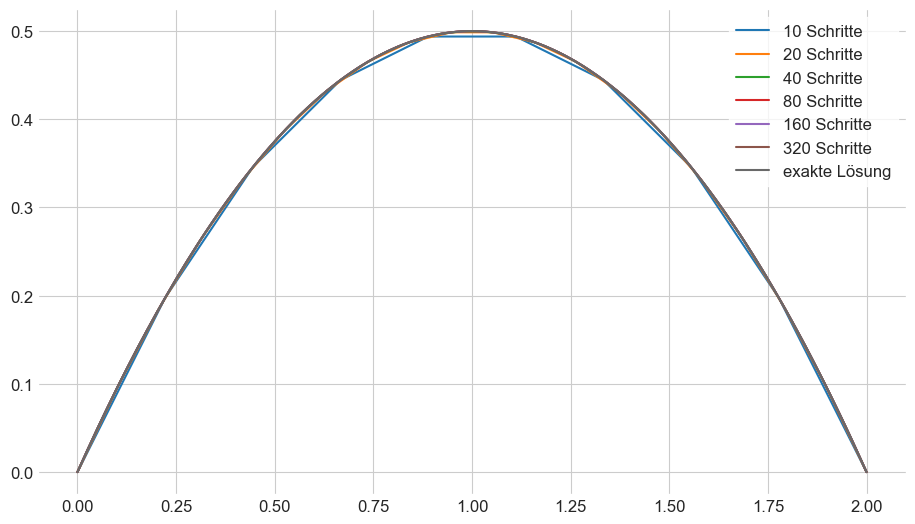

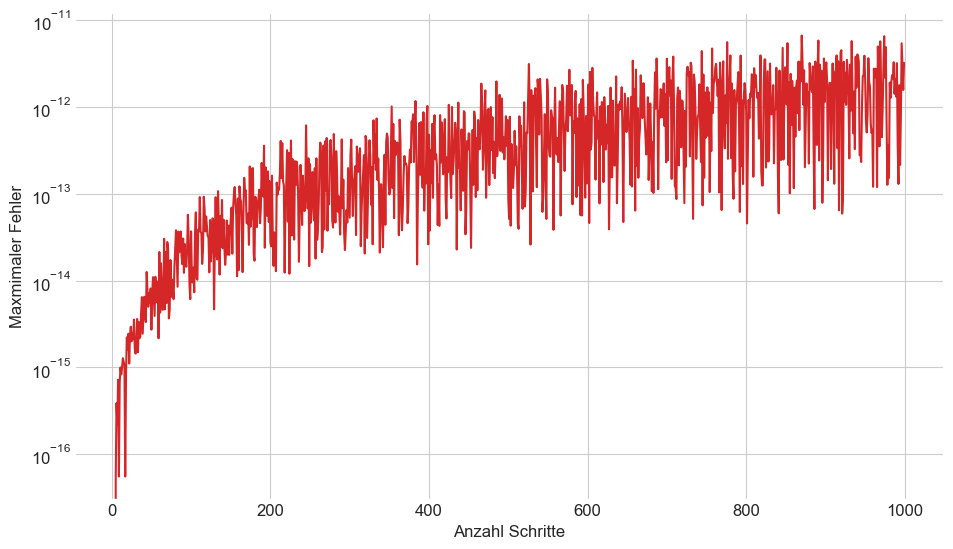

In [4]:
def f(x):
    return -x**0

def exact(x):
    return x - x**2 / 2

def error(N):
    '''Maximum norm'''
    grid = np.linspace(0, 2, N)
    u = FDM(f, ua, ub, grid)
    return max(np.abs(exact(grid) - u).flatten())

steps = 10 * 2**np.arange(6)
ua = ub = 0

for N in steps:
    grid = np.linspace(0, 2, N)
    u = FDM(f, ua, ub, grid)  
    plt.plot(grid, u, label=f"{N} Schritte")
    
plt.plot(grid, exact(grid), color="dimgray", label="exakte Lösung")
plt.legend()
plt.show()

x = np.arange(4, 1000)
y = [error(n) for n in x]
plt.plot(x, y, color="C3")
plt.yscale("log")
plt.xlabel("Anzahl Schritte")
plt.ylabel("Maxmimaler Fehler")
plt.show()

Man sieht, dass die Fehler sehr klein sind, aber es scheint als ob das Verfahren divergiert, da die Fehler wachsen. Das  kommt vermutlich aus der Division mit immer kleiner werdendem Nenner. Hier ist also Vorsicht geboten bei der Wahl des Gitters.

### Aufgabe 2

_Analog zu Aufgabe 1 für $\begin{cases} u''(x)=x,\ x \in [0,2]\\ u(0)=1,\ u(2)=2 \end{cases}.$_

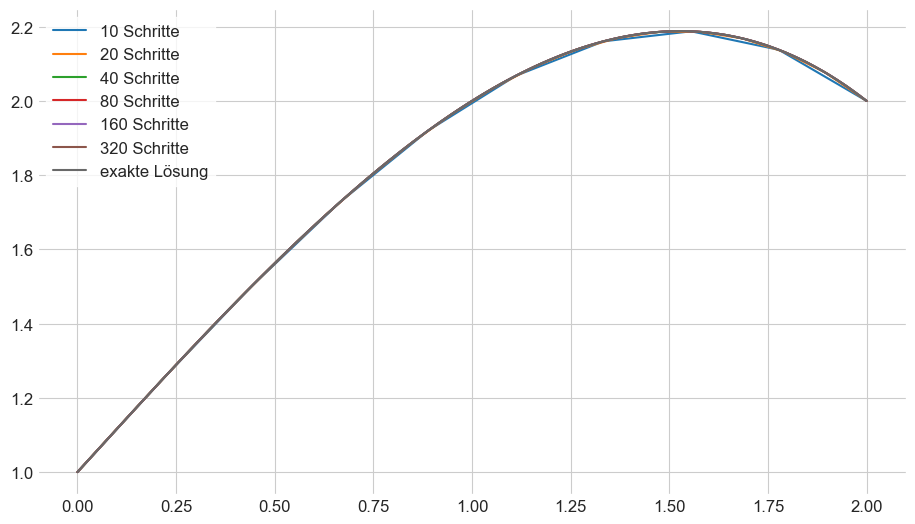

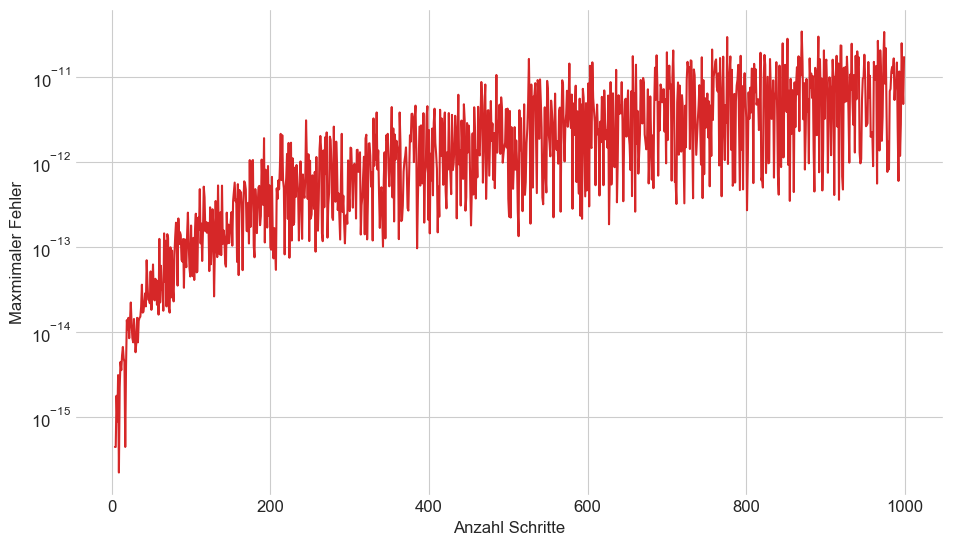

In [5]:
def f(x):
    return -x

def exact(x):
    return (-x**3 + 7*x + 6) / 6

def error(N):
    '''Maximum norm'''
    grid = np.linspace(0, 2, N)
    u = FDM(f, ua, ub, grid)
    return max(np.abs(exact(grid) - u).flatten())

steps = 10 * 2**np.arange(6)
ua = 1
ub = 2

for N in steps:
    grid = np.linspace(0, 2, N)
    u = FDM(f, ua, ub, grid)    
    plt.plot(grid, u, label=f"{N} Schritte")
    
plt.plot(grid, exact(grid), color="dimgray", label="exakte Lösung")
plt.legend()
plt.show()

x = np.arange(4, 1000)
y = [error(n) for n in x]
plt.plot(x, y, color="C3")
plt.yscale("log")
plt.xlabel("Anzahl Schritte")
plt.ylabel("Maxmimaler Fehler")
plt.show()

Man beobachtet hier denselben Effekt wie bei Aufgabe 1.